In [2]:
#! pip install prophet

## import libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

#desactivate warnings
import warnings
warnings.filterwarnings("ignore")

## read dataset

In [6]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 8275-508D

 Directorio de C:\Users\ortiz\OneDrive\Documentos\workspace\Time-Series-Forecasting-Prophet

14/02/2023  18:55    <DIR>          .
14/02/2023  18:55    <DIR>          ..
14/02/2023  18:51    <DIR>          .ipynb_checkpoints
14/02/2023  18:55             1.097 Forecasting.ipynb
14/02/2023  18:50            52.865 MaunaLoaDailyTemps.csv
14/02/2023  18:50               116 README.md
               3 archivos         54.078 bytes
               3 dirs  312.284.979.200 bytes libres


In [13]:
# Read data, drop null values and reset index inplace
df = pd.read_csv('MaunaLoaDailyTemps.csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [10]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


#### only interest on 'AvgTemp' and 'DATE' columns, this are the ones selected for prediction

In [17]:
df = df[['DATE','AvgTemp']]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


## Change columns names for Prophet

In [18]:
# setting default columns for prophet
df.columns = ['ds','y']

In [27]:
#Pass date col to datetime
df.ds = pd.to_datetime(df.ds)
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


## Plot your data

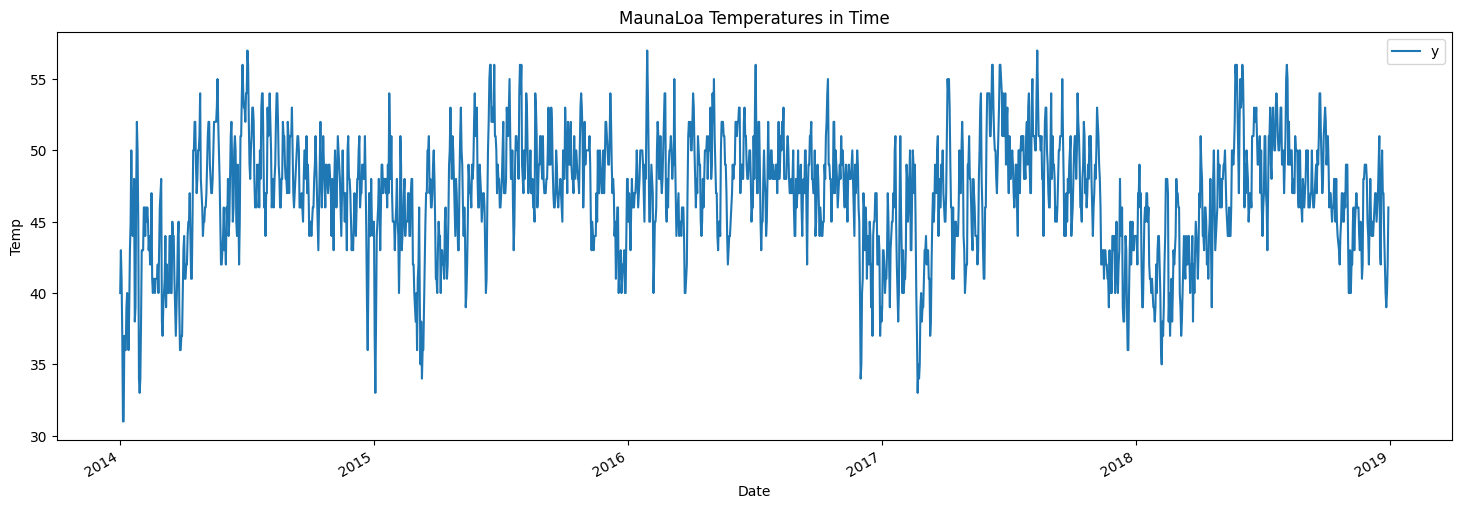

In [36]:
# visualization of MaunaLoa Temperatures in Time
df.plot(x='ds',y='y', figsize=(18,6))
plt.title('MaunaLoa Temperatures in Time')
plt.ylabel('Temp')
plt.xlabel('Date')
plt.show()

## Split into Train/Test set

In [38]:
len(df)

1821

In [39]:
train = df.loc[:len(df)-365] #all except las year
test = df.loc[len(df)-365:] #from last year till the end

## Making Predictions

In [51]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly {default:daily}
forecast = m.predict(future)

19:35:53 - cmdstanpy - INFO - Chain [1] start processing
19:35:53 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# inspect Future prediction
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1817,2018-12-26,46.320691,37.191725,45.773042,44.861515,47.920710,-4.871006,-4.871006,-4.871006,-0.054198,-0.054198,-0.054198,-4.816807,-4.816807,-4.816807,0.0,0.0,0.0,41.449685
1818,2018-12-27,46.320150,36.809083,46.235167,44.856914,47.924982,-4.737367,-4.737367,-4.737367,0.097072,0.097072,0.097072,-4.834439,-4.834439,-4.834439,0.0,0.0,0.0,41.582784
1819,2018-12-28,46.319610,37.617485,46.426996,44.855590,47.925611,-4.398551,-4.398551,-4.398551,0.425191,0.425191,0.425191,-4.823742,-4.823742,-4.823742,0.0,0.0,0.0,41.921058
1820,2018-12-29,46.319069,36.850134,45.942554,44.854791,47.928362,-4.781193,-4.781193,-4.781193,0.003657,0.003657,0.003657,-4.784851,-4.784851,-4.784851,0.0,0.0,0.0,41.537876
1821,2018-12-30,46.318529,36.662342,45.843198,44.854748,47.934132,-4.959118,-4.959118,-4.959118,-0.240746,-0.240746,-0.240746,-4.718372,-4.718372,-4.718372,0.0,0.0,0.0,41.359411


In [52]:
forecast_s = forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()
forecast_s

,ds,yhat,yhat_lower,yhat_upper
1817,2018-12-26,41.449685,36.617349,45.944900
1818,2018-12-27,41.582784,37.096442,45.819737
1819,2018-12-28,41.921058,37.312573,46.394573
1820,2018-12-29,41.537876,36.762898,45.935027
1821,2018-12-30,41.359411,37.062169,45.757760
